# Analyse de l'ampleur et du développement des violences sexuelles en France.

## Pré-traitement des données

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#pour l'automatisation, on enregistre le chemin dans une varibale de manière à pouvoir changer le chemin facilement
path_to_file = 'generated/data_sex.xlsx'

In [37]:
#importation des données
#feuille 1 : france_entière
df = pd.read_excel(path_to_file, sheet_name=1)
df.sample(5)

,Année_mois,Nombre_évenements,Index,libellé index
31,_2021_08,1400,46,Viols sur des majeur(e)s
92,_2021_01,1063,48,Harcèlements sexuels et autres agressions sexu...
112,_2019_11,1726,49,Harcèlements sexuels et autres agressions sexu...
6,_2019_07,1116,46,Viols sur des majeur(e)s
86,_2020_07,1422,48,Harcèlements sexuels et autres agressions sexu...


In [ ]:
#df_sex = df.copy()
#for index, row in df.iterrows():
    #print(row['libellé index'])

In [38]:
df['Année_mois'] = df['Année_mois'].str[1:]
df['Année'] = df['Année_mois'].str[:4]
df['Mois'] = df['Année_mois'].str[5:]
df

,Année_mois,Nombre_évenements,Index,libellé index,Année,Mois
0,2019_01,905,46,Viols sur des majeur(e)s,2019,01
1,2019_02,801,46,Viols sur des majeur(e)s,2019,02
2,2019_03,907,46,Viols sur des majeur(e)s,2019,03
3,2019_04,890,46,Viols sur des majeur(e)s,2019,04
4,2019_05,858,46,Viols sur des majeur(e)s,2019,05
...,...,...,...,...,...,...
165,2021_06,1451,50,Atteintes sexuelles,2021,06
166,2021_07,1243,50,Atteintes sexuelles,2021,07
167,2021_08,1184,50,Atteintes sexuelles,2021,08
168,2021_09,1345,50,Atteintes sexuelles,2021,09


/Users/Tupin/opt/anaconda3/envs/TPACO/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, "Évolution du nombre d'évènement par année")

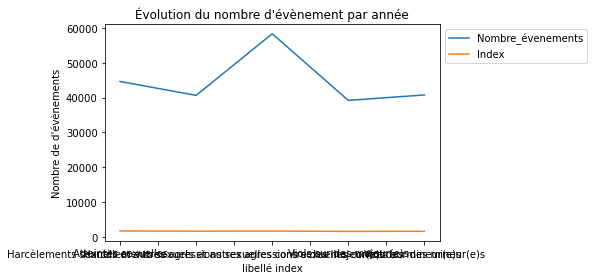

In [41]:
#visualiser le nombre d'infractions par années
df.groupby('libellé index').sum().plot()

plt.legend(bbox_to_anchor=(1.0, 1.0)) #mettre la légende hors du plot
plt.ylabel("Nombre de d'évènements")
plt.title("Évolution du nombre d'évènement par année")

In [4]:
#on prépare les données pour la transposition lignes/colonnes qu'on effectue après
#il faut résoudre le problème du double index
#pandas.DataFrame.set_index() définira la colonne passée en argument comme l’index de la DataFrame en surchargeant l’index initial.
#on utilise le libellé comme index
df.set_index('libellé index', inplace = True)
df.drop(columns = ['Index'], inplace = True)
df.head()

,_2021_09,_2021_08,_2021_07,_2021_06,_2021_05,_2021_04,_2021_03,_2021_02,_2021_01,_2020_12,...,_2000_10,_2000_09,_2000_08,_2000_07,_2000_06,_2000_05,_2000_04,_2000_03,_2000_02,_2000_01
libellé index,,,,,,,,,,,,,,,,,,,,,
Règlements de compte entre malfaiteurs,10,13,10,8,4,4,11,7,5,9,...,4,2,3,1,5,1,0,4,1,5
Homicides pour voler et à l'occasion de vols,4,0,1,2,2,0,1,1,0,2,...,2,1,9,2,3,3,7,4,5,2
Homicides pour d'autres motifs,44,45,52,59,49,36,47,36,42,45,...,40,41,36,44,48,47,42,37,57,32
Tentatives d'homicides pour voler et à l'occasion de vols,4,8,6,9,9,6,4,8,4,6,...,11,2,4,5,11,11,5,7,6,6
Tentatives homicides pour d'autres motifs,193,193,194,220,190,175,163,156,162,177,...,50,76,46,64,55,79,46,70,70,46


In [5]:
#on permute les lignes et colonnes
df_trans = df.transpose()
df_trans.head(3)

libellé index,Règlements de compte entre malfaiteurs,Homicides pour voler et à l'occasion de vols,Homicides pour d'autres motifs,Tentatives d'homicides pour voler et à l'occasion de vols,Tentatives homicides pour d'autres motifs,Coups et blessures volontaires suivis de mort,Autres coups et blessures volontaires criminels ou correctionnels,Prises d'otages à l'occasion de vols,Prises d'otages dans un autre but,Sequestrations,...,"Banqueroutes, abus de biens sociaux et autres délits de société",Index non utilisé,Index non utilisé,"Prix illicittes, publicité fausse et infractions aux règles de la concurrence",Achats et ventes sans factures,Infractions à l'exercice d'une profession règlementée,Infractions au droit de l'urbanisme et de la construction,Fraudes fiscales,Autres délits économiques et financiers,Autres délits
_2021_09,10,4,44,4,193,13,20873,5,8,360,...,53,0,0,55,4,76,102,48,1386,9175
_2021_08,13,0,45,8,193,6,17476,2,11,310,...,35,0,0,38,4,46,56,23,1251,7621
_2021_07,10,1,52,6,194,14,18342,5,7,289,...,53,0,0,38,2,78,82,32,1198,8075


In [6]:
#selectionner les colonnes avec les index correspondant aux infractions sexuelles (index 46 à 50)
df_sex = df_trans.iloc[:, 45:50]
df_sex.head()

libellé index,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles
_2021_09,1074,776,1002,1218,796
_2021_08,882,574,851,785,674
_2021_07,963,601,951,836,658
_2021_06,956,889,1062,1256,912
_2021_05,774,605,798,1005,778


In [7]:
#ajout d'un index
df_sex.reset_index(inplace = True)
df_sex.head()

libellé index,index,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles
0,_2021_09,1074,776,1002,1218,796
1,_2021_08,882,574,851,785,674
2,_2021_07,963,601,951,836,658
3,_2021_06,956,889,1062,1256,912
4,_2021_05,774,605,798,1005,778


In [8]:
#vérifier que les colonnes correspondent aux cinq infractions
print(list(df_sex.columns))

['index', 'Viols sur des majeur(e)s', 'Viols sur des mineur(e)s', 'Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s', 'Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s', 'Atteintes sexuelles']


In [9]:
df_sex = df_sex.rename(columns = {'Index':'Année_mois'})
df_sex.index.rename('Index', inplace=True)
df_sex.head()

libellé index,index,Viols sur des majeur(e)s,Viols sur des mineur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des majeur(e)s,Harcèlements sexuels et autres agressions sexuelles contre des mineur(e)s,Atteintes sexuelles
Index,,,,,,
0,_2021_09,1074,776,1002,1218,796
1,_2021_08,882,574,851,785,674
2,_2021_07,963,601,951,836,658
3,_2021_06,956,889,1062,1256,912
4,_2021_05,774,605,798,1005,778


In [10]:
#supprimer le tiret bas devant la date
df_sex['Année_mois'] = df_sex['Année_mois'].str[1:]

KeyError: 'Année_mois'

In [ ]:
#créer deux nouvelles colonnes pour l'année et le mois
df_sex['Année'] = df_sex['Année_mois'].str[:4]
df_sex['Mois'] = df_sex['Année_mois'].str[5:]
df_sex

In [ ]:
#exportation des données dans un fichier csv
df_sex.to_excel('./generated/data_sex.xlsx', index = False)

## Premières visualisations

In [ ]:
df_sex = pd.read_csv('generated/data_sex.csv')

In [ ]:
df_years = df_sex.drop(columns = ['Mois'])

In [ ]:
#visualiser le nombre d'infractions par années
df_years.groupby('Année').sum().plot()

plt.legend(bbox_to_anchor=(1.0, 1.0)) #mettre la légende hors du plot
plt.ylabel("Nombre de d'évènements")
plt.title("Évolution du nombre d'évènement par année")

## Visualiser l'incertitude

In [31]:
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import math

In [32]:
def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [34]:
# Calculate yearly stats across movies here

stats_by_year = df_sex.groupby(df_sex['Année_mois']).apply(lambda x: pd.Series({
        'average_rapes_maj': x['Viols sur des majeur(e)s'].mean(),
        'lower_err_rapes_maj': bootstrap_CI(x['Viols sur des majeur(e)s'], 1000)[0],
        'upper_err_rapes_maj': bootstrap_CI(x['Viols sur des majeur(e)s'], 1000)[1]
    }))

KeyError: 'Viols sur des majeur(e)s'

In [ ]:
plt.errorbar(stats_by_year.index, stats_by_year.average_rapes_maj,
             yerr = [-stats_by_year.lower_err_rapes_maj + stats_by_year.average_rapes_maj, 
                    -stats_by_year.average_rapes_maj + stats_by_year.upper_err_rapes_maj],
             capsize= 3)
plt.xlabel('Année')
plt.ylabel('Nombre de viols sur majeur')

In [ ]:
stats_by_year.lower_err_rapes_maj - \
 stats_by_year.average_rapes_maj

In [ ]:
plt.fill_between(stats_by_year.index, stats_by_year.lower_err_rapes_maj,
                 stats_by_year.upper_err_rapes_maj, alpha = 0.5, color = 'gray')
fig2 = plt.plot(stats_by_year.average_rapes_maj, color = 'black')

plt.xlabel('Année')
plt.ylabel('Nombre de viols sur majeur')

In [ ]:
stats_by_year = df_sex.groupby(df_sex['Année']).apply(lambda x: pd.Series({
        'average_att_sex': x['Atteintes sexuelles'].mean(),
        'lower_err_att_sex': bootstrap_CI(x['Atteintes sexuelles'], 1000)[0],
        'upper_err_att_sex': bootstrap_CI(x['Atteintes sexuelles'], 1000)[1]
    }))

plt.errorbar(stats_by_year.index, stats_by_year.average_att_sex,
             yerr = [-stats_by_year.lower_err_att_sex + stats_by_year.average_att_sex, 
                    -stats_by_year.average_att_sex + stats_by_year.upper_err_att_sex],
             capsize= 3)
plt.xlabel('Année')
plt.ylabel('Atteintes sexuelles')

stats_by_year.lower_err_att_sex - \
 stats_by_year.average_att_sex

In [ ]:
plt.fill_between(stats_by_year.index, stats_by_year.lower_err_att_sex,
                 stats_by_year.upper_err_att_sex, alpha = 0.5, color = 'gray')
fig1 = plt.plot(stats_by_year.average_att_sex, color = 'black')

plt.xlabel('Année')
plt.ylabel('Atteintes sexuelles')

## Panels

- Quelles infractions ont le plus augmentées dans le temps ?

In [ ]:
infractions = list(df_years.drop(columns = ['Année_mois','Année']).columns)
infractions

In [ ]:
stats_par_infraction = df_sex.groupby('Année').apply(lambda x: pd.Series({
        'Viols sur des majeur(e)s': x['Viols sur des majeur(e)s'].values
    }))

In [ ]:
stats_par_infraction

In [ ]:
ax = sns.barplot(x="Année", y="Viols sur des majeur(e)s", data=df_sex.loc[df_sex['Année'].isin(['2018','2019',
                                                                                      '2020','2021'])])

In [ ]:
fig, ax = plt.subplots(1,2,
                       figsize= (12,6),
                       sharey = True,
                       sharex = True)

plt.fill_between(stats_by_year.index, stats_by_year.lower_err_att_sex,
                 stats_by_year.upper_err_att_sex, alpha = 0.5, color = 'gray')
fig1 = plt.plot(stats_by_year.average_att_sex, color = 'black')



fig.text(0.4,0, "Viols sur majeurs")
fig.text(0,0.6, "Année", rotation = 90)